<a href="https://colab.research.google.com/github/i2ohanl/Facial-expression-recog/blob/main/Week3Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# importing important stuff...

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 7.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=d94d0bdcd7b38ce3987a6f55d0f3639ecd914a4cde0b34c355fd1c7d66c68922
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"akandco","key":"4c5fcbfc35ab184ea5666056c5cd447c"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d manishshah120/facial-expression-recog-image-ver-of-fercdataset

 85% 61.0M/72.0M [00:00<00:00, 104MB/s] 
100% 72.0M/72.0M [00:00<00:00, 131MB/s]


In [ ]:
! unzip facial-expression-recog-image-ver-of-fercdataset.zip -d dataset

Streaming output truncated to the last 5000 lines.
  inflating: dataset/Dataset/train/sadness/764414392.png  
  inflating: dataset/Dataset/train/sadness/764510503.png  
  inflating: dataset/Dataset/train/sadness/764533657.png  
  inflating: dataset/Dataset/train/sadness/764617869.png  
  inflating: dataset/Dataset/train/sadness/764716589.png  
  inflating: dataset/Dataset/train/sadness/764732558.png  
  inflating: dataset/Dataset/train/sadness/764815893.png  
  inflating: dataset/Dataset/train/sadness/765528933.png  
  inflating: dataset/Dataset/train/sadness/76567832.png  
  inflating: dataset/Dataset/train/sadness/765797923.png  
  inflating: dataset/Dataset/train/sadness/765865169.png  
  inflating: dataset/Dataset/train/sadness/766036622.png  
  inflating: dataset/Dataset/train/sadness/766099600.png  
  inflating: dataset/Dataset/train/sadness/766168610.png  
  inflating: dataset/Dataset/train/sadness/766442363.png  
  inflating: dataset/Dataset/train/sadness/766746230.png  
  infl

# Transfer Learning part


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path = "/content/dataset/Dataset/train"
test_path = "/content/dataset/Dataset/test"

#Data Augmentation flippin data

In [ ]:
#Define augmentation
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range=5,
    horizontal_flip=True,
    vertical_flip=True,
)

train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (100,100),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

test_dataset_aug = dataGen.flow_from_directory(
    test_path,
    target_size = (100,100),
    batch_size = 32,
    shuffle=True,
    seed = 865
)

Found 32298 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    weights="imagenet",
    input_shape=(100,100,3),
)


94773248/94765736 [==============================] - 1s 0us/step


In [ ]:

pretrained_model.trainable = False

In [ ]:
pretrained_model.summary()
model = tf.keras.models.Sequential()
model.add(pretrained_model)
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(7, activation='softmax'))


Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
model.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 15)

Epoch 1/15
1010/1010 [==============================] - 168s 129ms/step - loss: 1.5792 - accuracy: 0.4049 - val_loss: 1.4055 - val_accuracy: 0.4489
Epoch 2/15
1010/1010 [==============================] - 129s 127ms/step - loss: 1.2956 - accuracy: 0.5043 - val_loss: 1.4970 - val_accuracy: 0.4277
Epoch 3/15
1010/1010 [==============================] - 128s 127ms/step - loss: 1.1959 - accuracy: 0.5479 - val_loss: 1.5519 - val_accuracy: 0.4578
Epoch 4/15
1010/1010 [==============================] - 128s 127ms/step - loss: 1.1507 - accuracy: 0.5713 - val_loss: 1.6233 - val_accuracy: 0.4338
Epoch 5/15
1010/1010 [==============================] - 128s 127ms/step - loss: 1.1101 - accuracy: 0.5790 - val_loss: 1.5263 - val_accuracy: 0.4138
Epoch 6/15
1010/1010 [==============================] - 128s 127ms/step - loss: 1.0674 - accuracy: 0.5981 - val_loss: 1.3698 - val_accuracy: 0.5026
Epoch 7/15
1010/1010 [==============================] - 128s 126ms/step - loss: 1.0368 - accuracy: 0.6089 - val_

In [ ]:
!mkdir -p saved_model

In [ ]:
model.save('/content/saved_model')

INFO:tensorflow:Assets written to: /content/saved_model/assets


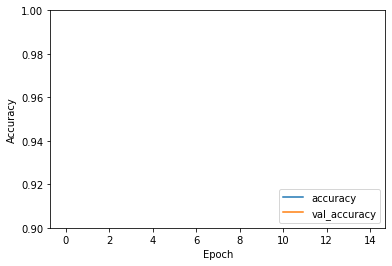

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')
plt.show()